In [210]:
#Defining the model 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import SGD,Adam,RMSprop
#fitting the model and predicting 
from keras.utils import to_categorical

import numpy as np # linear algebra
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random

In [223]:
(x_train, x_test), (x_test, y_test) = mnist.load_data()

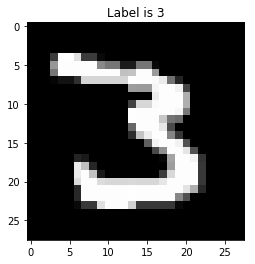

In [231]:
n = random.randint(0, x_train.shape[0]-1)
plt.title('Label is {label}'.format(label=y_train[n]))
plt.imshow(train_images[n], cmap='gray')
plt.show()

In [213]:
model = Sequential()

#sigmoid, tanh, softmax, ReLU, Leaky ReLU
model.add(Dense(28, activation='sigmoid', input_shape=(28, 28)))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(int(28*28/4), activation='sigmoid'))
model.add(Dropout(0.15))
model.add(Dense(10, activation='softmax'))

model.compile(RMSprop(lr=0.001),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 28, 28)            812       
_________________________________________________________________
dropout_36 (Dropout)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 196)               153860    
_________________________________________________________________
dropout_37 (Dropout)         (None, 196)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 10)                1970      
Total params: 156,642
Trainable params: 156,642
Non-trainable params: 0
_________________________________________________________________


In [214]:
def aprender(x_train, y_train):
    model.fit(x_train,to_categorical(y_train),epochs=5,validation_split=0.05,batch_size=64)

In [215]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [218]:
aprender(x_train, y_train)

Train on 57000 samples, validate on 3000 samples
Epoch 1/2
57000/57000 [==============================] - 35s 607us/step - loss: 0.1380 - acc: 0.9569 - val_loss: 0.0857 - val_acc: 0.9747
Epoch 2/2
57000/57000 [==============================] - 35s 606us/step - loss: 0.1241 - acc: 0.9608 - val_loss: 0.0817 - val_acc: 0.9770


In [10]:
to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [224]:
x_test.shape

(10000, 28, 28)

In [12]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [225]:
y_pred = model.predict(x_test)
y_pred[0]

array([2.0316020e-10, 3.1127265e-09, 1.0023805e-05, 9.3512372e-06,
       7.8463778e-09, 7.0850604e-08, 1.4325280e-13, 9.9997127e-01,
       6.3622063e-09, 9.3018634e-06], dtype=float32)

In [226]:
y_test_class = y_test #np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Prediccion: 2


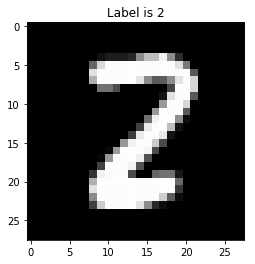

In [236]:
n = random.randint(1, y_test_class.shape[0]) - 1
y_pred = model.predict(x_test[n:n+1])
print("Prediccion: {}".format(np.argmax(y_pred,axis=1)[0]))
plt.title('Label is {label}'.format(label=y_test[n]))
plt.imshow(test_images[n], cmap='gray')
plt.show()

In [228]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [229]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       980
          1       0.99      0.98      0.99      1135
          2       0.97      0.97      0.97      1032
          3       0.97      0.97      0.97      1010
          4       0.98      0.96      0.97       982
          5       0.98      0.95      0.96       892
          6       0.98      0.98      0.98       958
          7       0.94      0.98      0.96      1028
          8       0.96      0.98      0.97       974
          9       0.97      0.94      0.96      1009

avg / total       0.97      0.97      0.97     10000

[[ 973    0    1    0    0    1    0    2    3    0]
 [   0 1114    5    2    1    1    4    2    6    0]
 [  10    0  998    0    3    0    1   12    8    0]
 [   0    0    8  975    0   11    0    9    5    2]
 [   5    0    0    1  945    0    6    5    2   18]
 [   6    1    1   16    2  848    9    3    4    2]
 [   9    1    3    1    1    3  935    0  